# Heart Attack Analysis & Prediction Using Machine Learning | Logistic Regression, Random Forest Classifier & SVM

In [4]:
# Importing Libraries 

import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
# Reading Files 

data = pd.read_csv(r"C:\Users\abhi\Documents\Reading_Files_In_Pandas\heart.csv")
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data.isna().sum() # Finding if there are any null values present in the dataset

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# Filtering data by POSITIVE Heart Disease patient

pos_output = data[data["output"]== 1]
pos_output

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [10]:
# Filtering data by NEGATIVE Heart Disease patient

neg_output = data[data["output"]== 0]
neg_output

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [11]:
print("Positive Patients ST depression :", str(pos_output['oldpeak'].mean()))
print("Negative Patients ST depression :", str(neg_output['oldpeak'].mean()))

Positive Patients ST depression : 0.583030303030303
Negative Patients ST depression : 1.5855072463768116


In [12]:
print("Positive Patients thalachh :", str(pos_output['thalachh'].mean()))
print("Negative Patients thalachh :", str(neg_output['thalachh'].mean()))

Positive Patients thalachh : 158.46666666666667
Negative Patients thalachh : 139.1014492753623


From comparing positive and negative patients we can see there are vast differences in means for many of our 13 Features. From examining the details, we can observe that positive patients experience heightened maximum heart rate achieved (thalach) average. In addition, positive patients exhibit about 1/3rd the amount of ST depression induced by exercise relative to rest (oldpeak).

In [13]:
data["output"].value_counts() # output: Target variable (1 = Presence of heart disease, 0 = Absence of heart disease)

output
1    165
0    138
Name: count, dtype: int64

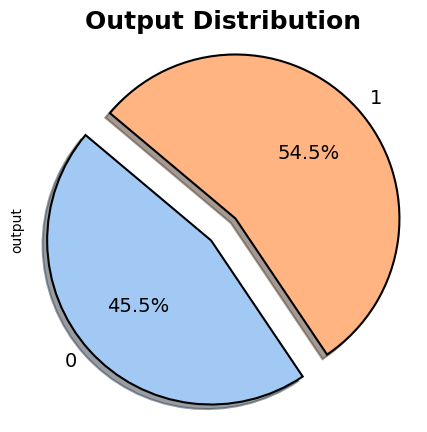

In [14]:
# Output Distribution visual representation through pie chart 

plt.figure(figsize=(5,5))
palette_color = sns.color_palette('pastel')

explode = [0.1 for _ in range(data["output"].nunique()) ]
output_counts = data.groupby("output")["output"].count()

output_counts.plot.pie(
    colors = palette_color,
    explode = explode,
    autopct = "%1.1f%%",
    shadow = True,
    startangle = 140,
    textprops = {'fontsize': 14},
    wedgeprops = {'edgecolor': 'black', 'linewidth': 1.5}
)

plt.title("Output Distribution", fontsize=18, weight='bold')
plt.axis('equal')
plt.show()

In [15]:
# Gender Distribution visual representation through pie chart 

plt.figure(figsize=(5,5))
palette_color = sns.color_palette('pastel')

explode = [0.1 for _ in range(data["sex"].nunique()) ]

gendercounts = data.groupby('sex')["sex"].count()
gendercounts # sex: Gender of the patient (1 = Male, 0 = Female)

sex
0     96
1    207
Name: sex, dtype: int64

<Figure size 500x500 with 0 Axes>

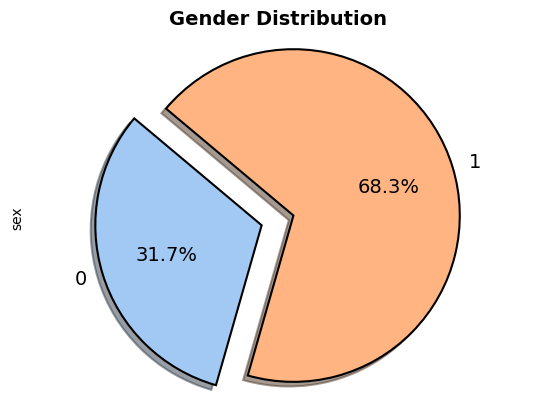

In [16]:
gendercounts.plot.pie(
    colors = palette_color,
    explode = explode,
    autopct = "%1.1f%%",
    shadow = True,
    startangle = 140,
    textprops = {'fontsize': 14},
    wedgeprops = {'edgecolor': 'black', 'linewidth': 1.5}
)
plt.title("Gender Distribution", fontsize=14, weight='bold')
plt.axis('equal')
plt.show()


<Axes: >

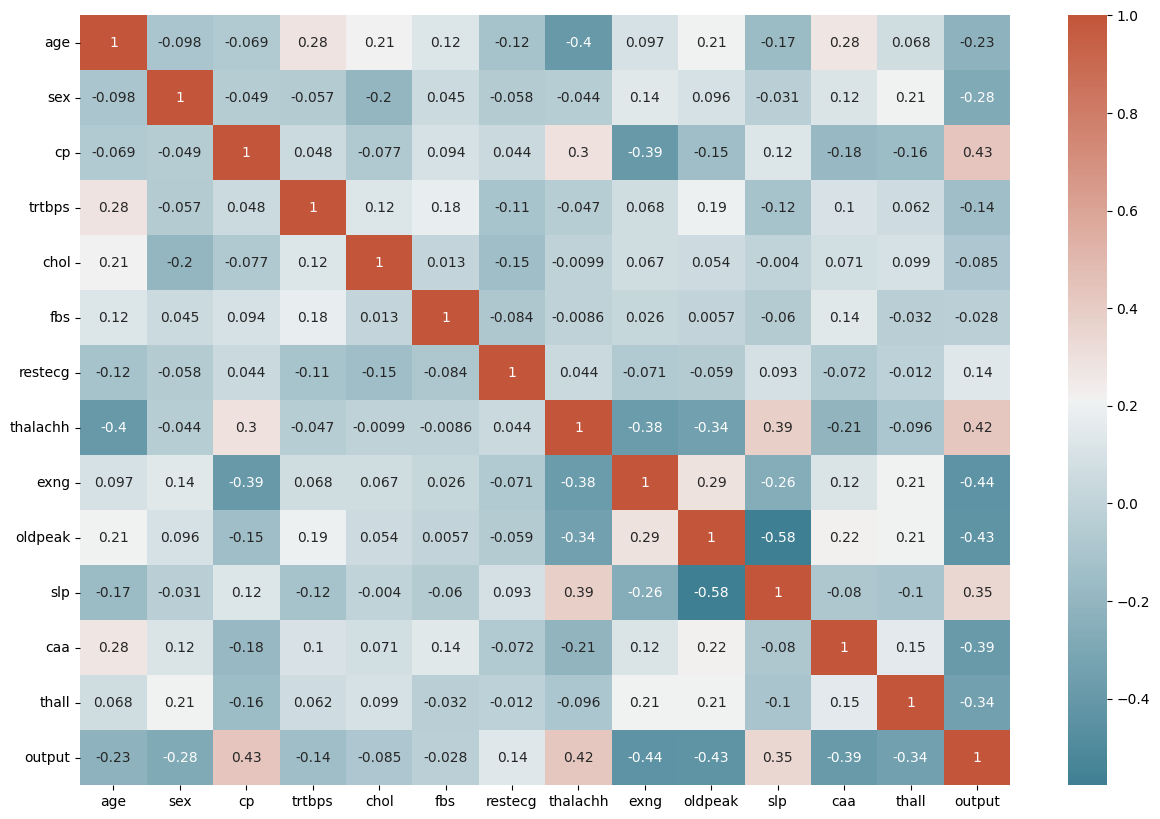

In [17]:
# correlation matrix (positive or negative relations between the coloumns)

corr = data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, 
            yticklabels=corr.columns, 
            annot=True, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True))


We observe a positive correlation between chest pain (cp) and the output variable (our predictor). This is logical, as a higher level of chest pain increases the likelihood of heart disease. The cp (chest pain) feature is ordinal, with four distinct values:

1: Typical angina
2: Atypical angina
3: Non-anginal pain
4: Asymptomatic

Additionally, there is a negative correlation between exercise-induced angina (exang) and the output variable. This is reasonable because during exercise, the heart demands more blood, but narrowed arteries caused by angina reduce the blood flow.

Text(0.5, 1.0, 'Resting Blood Pressure')

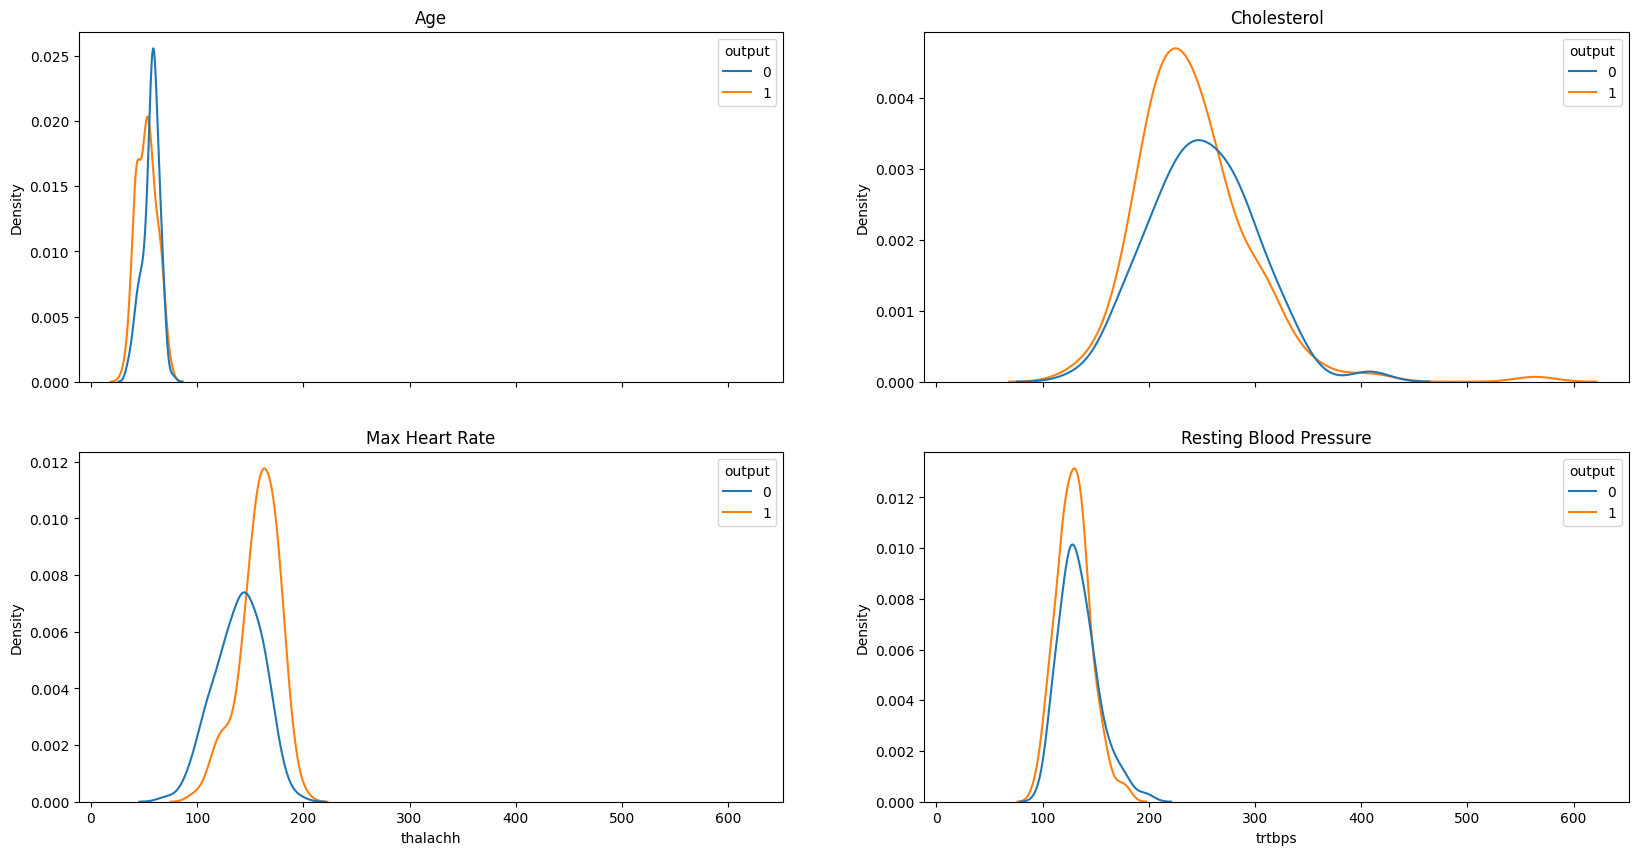

In [18]:
fig, axes = plt.subplots(2,2, sharex = True, figsize=(20,10))

sns.kdeplot(data, x='age', hue = "output", ax=axes[0,0])
axes[0,0].set_title('Age')

sns.kdeplot(data, x='chol',hue = "output", ax=axes[0,1])
axes[0,1].set_title('Cholesterol')

sns.kdeplot(data, x='thalachh',hue = "output", ax=axes[1,0])
axes[1,0].set_title('Max Heart Rate')

sns.kdeplot(data, x='trtbps',hue = "output", ax=axes[1,1])
axes[1,1].set_title('Resting Blood Pressure')

The KDE plots show the distribution of key features across heart disease outcomes:   
1.Age vs. Output: Compares age distribution for people with and without heart disease.   
2.Cholesterol vs. Output: Displays cholesterol levels, helping identify if higher cholesterol correlates with heart disease    
3.Max Heart Rate (thalachh) vs. Output: Compares maximum heart rate during exercise between the two groups.   
4.Resting Blood Pressure (trtbps) vs. Output: Shows resting blood pressure distribution, highlighting its relationship with heart disease.

Text(36.804208333333335, 0.5, 'ST Depression')

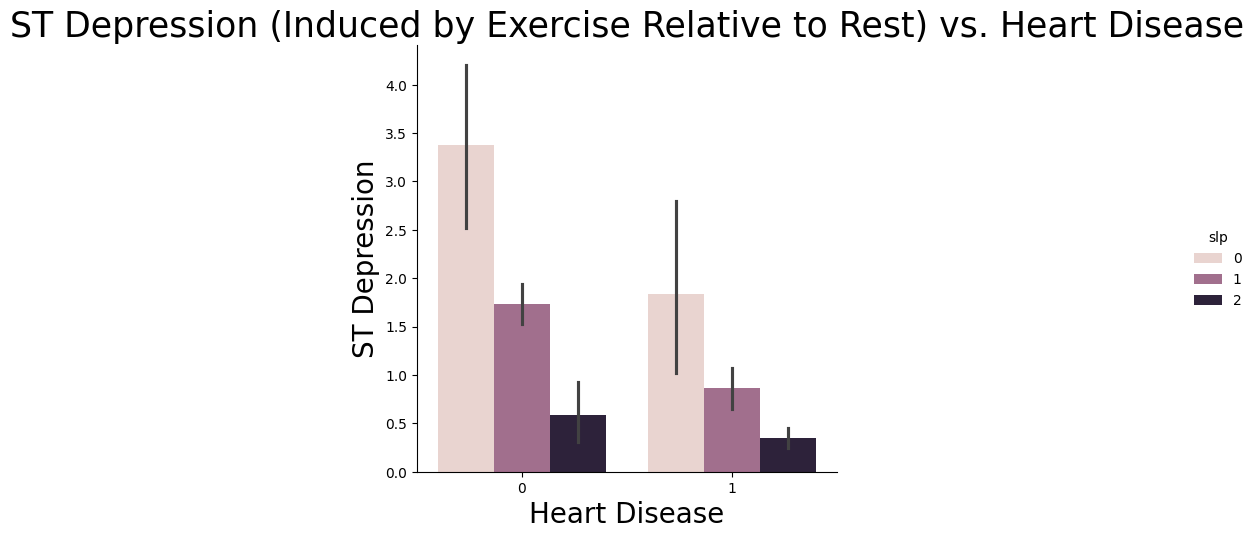

In [19]:
sns.catplot(x = 'output', y = 'oldpeak', hue = 'slp', kind = 'bar', data = data )
plt.title('ST Depression (Induced by Exercise Relative to Rest) vs. Heart Disease', size=25)
plt.xlabel('Heart Disease', size = 20)
plt.ylabel('ST Depression', size = 20)

ST segment depression occurs when the ventricle is repolarized and the ST trace falls below the baseline, indicating a higher risk of heart disease. The "slope" hue represents the peak exercise ST segment, with values: 0 (upsloping), 1 (flat), and 2 (downsloping). Both heart disease-positive and negative patients show similar distributions across these slope categories.

# Machine Learning Models And Analysis

In [20]:
# Assigning the 13 features to X & the last column to our classification predictor, y

X = data.iloc[:, :-1].values
y = data.iloc[:,-1].values

In [21]:
# Importing Libraries Required For Machine Learning

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score


In [22]:
# Spliting the data set into the Training set and Testing set

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test) 

In [23]:
# Importing Logistic Regression Model For Prediction

from sklearn.linear_model import LogisticRegression 

In [24]:
log_reg_model = LogisticRegression(random_state=1)
log_reg_model.fit(x_train,y_train)
y_predt_log_Reg = log_reg_model.predict(x_test)
print(classification_report(y_test,y_predt_log_Reg))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        30
           1       0.72      0.84      0.78        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



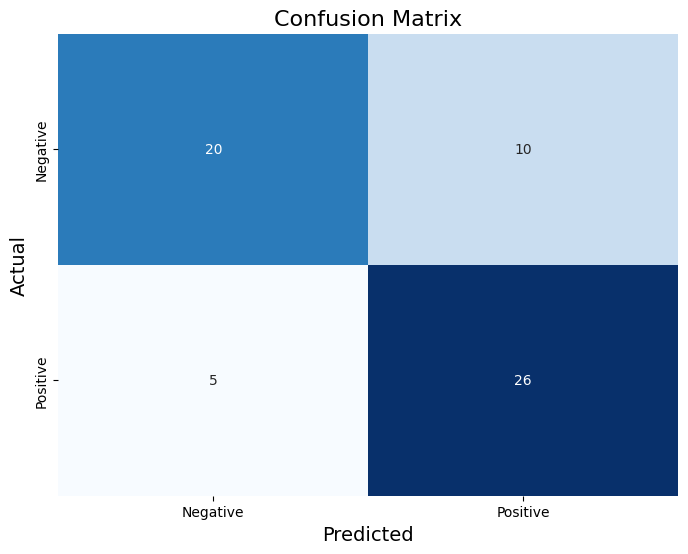

0.7540983606557377

In [25]:
# Creating a Confusion Matrix for the Predicted Results | Logistic Regression 

cm = confusion_matrix(y_test,y_predt_log_Reg)
# print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()
accuracy_score(y_test,y_predt_log_Reg)


In [26]:
# Importing Random Forest Model For Prediction

from sklearn.ensemble import RandomForestClassifier


In [27]:
ran_for_model = RandomForestClassifier(random_state=1)
ran_for_model.fit(x_train, y_train)
y_predt_ran_for = ran_for_model.predict(x_test)
print(classification_report(y_test,y_predt_ran_for))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        30
           1       0.76      0.90      0.82        31

    accuracy                           0.80        61
   macro avg       0.82      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



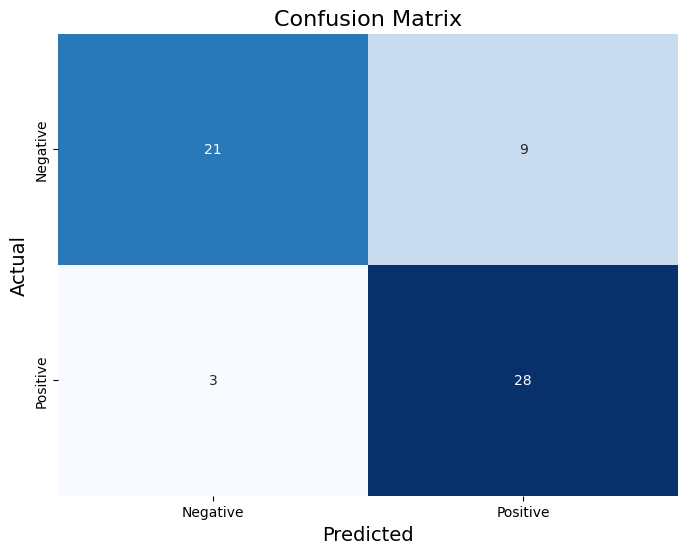

0.8032786885245902

In [28]:
# Creating a Confusion Matrix for the Predicted Results | Random Forest 

cm = confusion_matrix(y_test,y_predt_ran_for)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()
accuracy_score(y_test,y_predt_ran_for)


In [29]:
# Importing SVM Model For Prediction

from sklearn import svm

In [30]:
svm_model = svm.SVC(kernel='rbf')
svm_model.fit(x_train,y_train)
y_predt_svm = svm_model.predict(x_test)
print(classification_report(y_test, y_predt_svm))

              precision    recall  f1-score   support

           0       0.83      0.67      0.74        30
           1       0.73      0.87      0.79        31

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



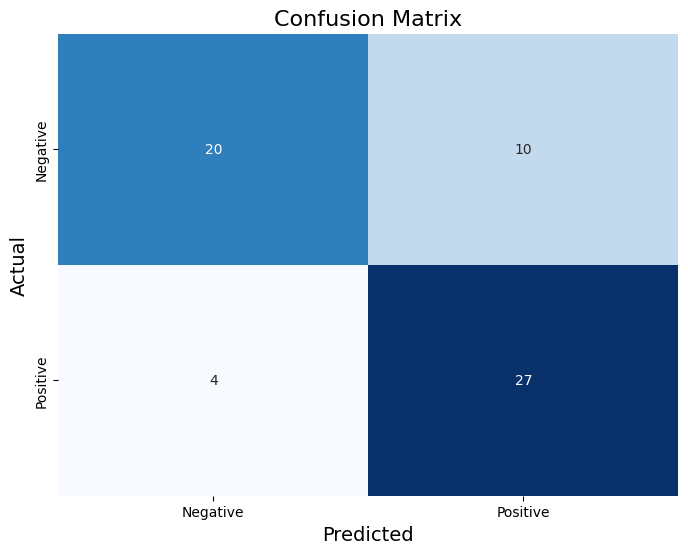

0.7704918032786885

In [31]:
# Creating a Confusion Matrix for the Predicted Results | SVM

cm = confusion_matrix(y_test,y_predt_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()
accuracy_score(y_test,y_predt_svm)

In [32]:
# Storing all the Model Names & Their Predictions Into A Dataframe

Models = ['Random Forest', 'Logistic Regression', 'SVM']
Model_Prediction = [y_predt_ran_for, y_predt_log_Reg, y_predt_svm]
accuracy_scores = []

for ModelName, Prediction in zip(Models, Model_Prediction) :
        accuracy = accuracy_score(y_test, Prediction)
        accuracy_scores.append({'Model': ModelName, 'Accuracy': accuracy})

accuracy_df = pd.DataFrame(accuracy_scores)

print("Model Accuracy Scores:")
print(accuracy_df)  

Model Accuracy Scores:
                 Model  Accuracy
0        Random Forest  0.803279
1  Logistic Regression  0.754098
2                  SVM  0.770492
